### Problem Statement

---

Recognizing multi-digit numbers in photographs captured at street level is an important component of modern day map making. A classic example of a corpus of such street-level photographs is Google’s Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. The ability to automatically transcribe an address number from a geo-located patch of pixels and associate the transcribed number with a known street address helps pinpoint, with a high degree of accuracy, the location of the building it represents.


More broadly, recognizing numbers in photographs is a problem of interest to the optical character recognition community. While OCR on constrained domains like document processing is well studied, arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty arises due to the wide variability in the visual appearance of text in the wild on account of a large range of fonts, colors, styles,
orientations, and character arrangements. The recognition problem is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions as well as by image acquisition factors such as resolution, motion, and focus blurs.


In this project, we will use a dataset with images centered around a single digit (many of the
images do contain some distractors at the sides). Although we are taking a sample of
the data which is simpler, it is more complex than MNIST because of the distractors.

In [1]:
#importing required packages

import numpy as np
import pandas as pd
import tensorflow
import h5py

print(tensorflow.__version__)

2.2.0-rc1


In [2]:
from google.colab import drive
drive.mount('/content/Anton', force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/Anton


In [0]:
f = h5py.File('Anton/My Drive/Colab Notebooks/ANN_Labs/SVHN_single_grey1-2.h5', 'r')

In [4]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [0]:
X_train = f['X_train']
X_train = np.array(X_train[:])
y_train = f['y_train']
y_train = np.array(y_train[:])
X_test = f['X_test']
X_test = np.array(X_test[:])
y_test = f['y_test']
y_test = np.array(y_test[:])
X_val = f['X_val']
X_val = np.array(X_val[:])
y_val = f['y_val']
y_val = np.array(y_val[:])

In [0]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(
    y_train,
    num_classes=10,
    dtype='float64'
)

y_test = to_categorical(
    y_test,
    num_classes=10,
    dtype='float64'
)

y_val = to_categorical(
    y_val,
    num_classes=10,
    dtype='float64'
)

In [0]:
# normalizing all the data in test, train and val

X_train = X_train/255
X_test =  X_test/255
X_val = X_val/255

In [0]:
w, h = 32, 32
X_train = X_train.reshape(X_train.shape[0], w, h, 1)
X_test = X_test.reshape(X_test.shape[0], w, h, 1)
X_val = X_val.reshape(X_val.shape[0], w, h, 1)

In [9]:
X_val.shape

(60000, 32, 32, 1)

In [0]:
tensorflow.keras.backend.clear_session()

In [0]:
from tensorflow.keras import models, layers

In [0]:
model = models.Sequential()
model.add(layers.Conv2D(64, (3,3), activation='relu', input_shape=(w,h,1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(50, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(30, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))

In [0]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=500)

Epoch 1/15
84/84 [==============================] - 307s 4s/step - loss: 2.3023 - accuracy: 0.1015 - val_loss: 2.2892 - val_accuracy: 0.1397
Epoch 2/15
84/84 [==============================] - 306s 4s/step - loss: 1.7092 - accuracy: 0.4015 - val_loss: 0.8392 - val_accuracy: 0.7532
Epoch 3/15
84/84 [==============================] - 306s 4s/step - loss: 0.9084 - accuracy: 0.7235 - val_loss: 0.5502 - val_accuracy: 0.8354
Epoch 4/15
84/84 [==============================] - 306s 4s/step - loss: 0.6864 - accuracy: 0.8005 - val_loss: 0.4570 - val_accuracy: 0.8662
Epoch 5/15
84/84 [==============================] - 305s 4s/step - loss: 0.5726 - accuracy: 0.8363 - val_loss: 0.3953 - val_accuracy: 0.8828
Epoch 6/15
84/84 [==============================] - 305s 4s/step - loss: 0.5119 - accuracy: 0.8564 - val_loss: 0.3527 - val_accuracy: 0.8978
Epoch 7/15
84/84 [==============================] - 305s 4s/step - loss: 0.4614 - accuracy: 0.8711 - val_loss: 0.3311 - val_accuracy: 0.9043
Epoch 8/15
84

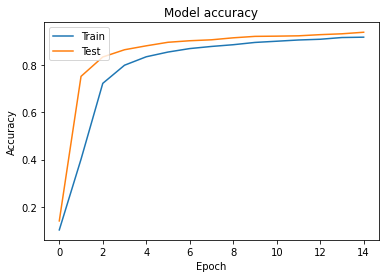

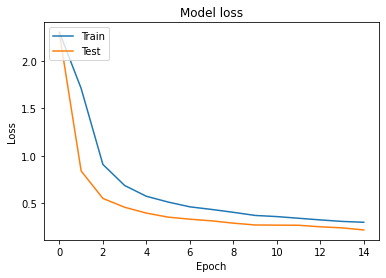

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [16]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 27s 48ms/step - loss: 0.2922 - accuracy: 0.9193


[0.2921583950519562, 0.9192777872085571]

In [0]:
# implementing ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen1 = ImageDataGenerator(
        rotation_range = 360,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        shear_range = 0.3,# shear angle in counter-clockwise direction in degrees  
        width_shift_range=0.08,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.08,  # randomly shift images vertically (fraction of total height)
        vertical_flip=True,
        horizontal_flip=True)

In [0]:
datagen1.fit(X_train)

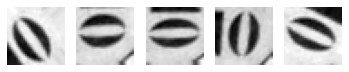

In [19]:
from matplotlib import pyplot as plt
gen = datagen1.flow(X_train[11:12], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

In [20]:
history = model.fit(datagen1.flow(X_train, y_train, batch_size = 100), epochs = 10, 
                              validation_data=(X_val, y_val), verbose=2, 
                              steps_per_epoch=X_train.shape[0] // 100)

Epoch 1/10
420/420 - 324s - loss: 1.9684 - accuracy: 0.2751 - val_loss: 0.9402 - val_accuracy: 0.7724
Epoch 2/10
420/420 - 323s - loss: 1.6971 - accuracy: 0.3874 - val_loss: 0.9471 - val_accuracy: 0.7412
Epoch 3/10
420/420 - 323s - loss: 1.5666 - accuracy: 0.4380 - val_loss: 0.8812 - val_accuracy: 0.7474
Epoch 4/10
420/420 - 324s - loss: 1.4824 - accuracy: 0.4730 - val_loss: 0.8347 - val_accuracy: 0.7624
Epoch 5/10
420/420 - 324s - loss: 1.4231 - accuracy: 0.4931 - val_loss: 0.8020 - val_accuracy: 0.7678
Epoch 6/10
420/420 - 323s - loss: 1.3869 - accuracy: 0.5046 - val_loss: 0.8191 - val_accuracy: 0.7455
Epoch 7/10
420/420 - 326s - loss: 1.3362 - accuracy: 0.5241 - val_loss: 0.8493 - val_accuracy: 0.7043
Epoch 8/10
420/420 - 325s - loss: 1.3090 - accuracy: 0.5365 - val_loss: 0.8936 - val_accuracy: 0.7273
Epoch 9/10
420/420 - 327s - loss: 1.2700 - accuracy: 0.5517 - val_loss: 0.7748 - val_accuracy: 0.7477
Epoch 10/10
420/420 - 326s - loss: 1.2447 - accuracy: 0.5598 - val_loss: 0.8206 - 

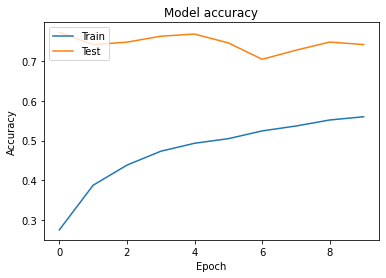

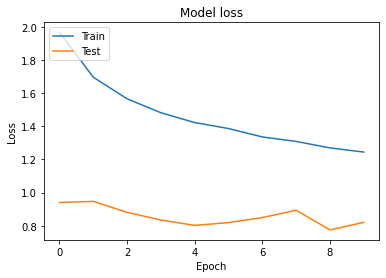

In [21]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [22]:
model.evaluate(X_test, y_test)

563/563 [==============================] - 27s 48ms/step - loss: 0.8170 - accuracy: 0.7420


[0.8169934153556824, 0.7419999837875366]

In [0]:
X_Train_Val = np.concatenate((X_train, X_val), axis=0)
y_Train_Val = np.concatenate((y_train, y_val), axis=0)

In [24]:
history = model.fit(X_Train_Val, y_Train_Val, epochs=15, validation_data=(X_test, y_test), batch_size=1024)

Epoch 1/15
100/100 [==============================] - 569s 6s/step - loss: 0.5964 - accuracy: 0.8278 - val_loss: 0.3647 - val_accuracy: 0.8967
Epoch 2/15
100/100 [==============================] - 570s 6s/step - loss: 0.4258 - accuracy: 0.8842 - val_loss: 0.3140 - val_accuracy: 0.9127
Epoch 3/15
100/100 [==============================] - 572s 6s/step - loss: 0.3715 - accuracy: 0.9000 - val_loss: 0.2841 - val_accuracy: 0.9216
Epoch 4/15
100/100 [==============================] - 570s 6s/step - loss: 0.3418 - accuracy: 0.9092 - val_loss: 0.2679 - val_accuracy: 0.9263
Epoch 5/15
100/100 [==============================] - 568s 6s/step - loss: 0.3185 - accuracy: 0.9157 - val_loss: 0.2546 - val_accuracy: 0.9291
Epoch 6/15
100/100 [==============================] - 570s 6s/step - loss: 0.2972 - accuracy: 0.9212 - val_loss: 0.2428 - val_accuracy: 0.9322
Epoch 7/15
100/100 [==============================] - 569s 6s/step - loss: 0.2786 - accuracy: 0.9273 - val_loss: 0.2302 - val_accuracy: 0.9358

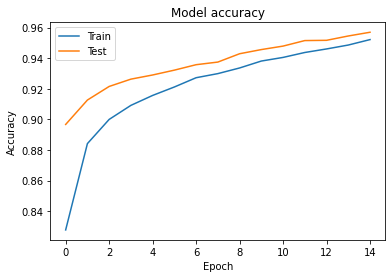

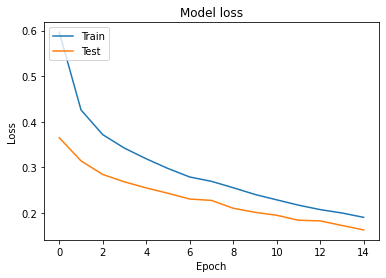

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [31]:
evals = model.evaluate(X_test, y_test)

563/563 [==============================] - 28s 49ms/step - loss: 0.1617 - accuracy: 0.9570


In [32]:
acc = float(history.history['accuracy'][9])
acc = round(acc, 5)
valacc = float(evals[1])
valacc = round(valacc, 5)
print("Training Accuracy : {} %".format(acc*100))
print("Validation Accuracy : {} %".format(valacc*100))

Training Accuracy : 93.817 %
Validation Accuracy : 95.7 %
